Ponto Ótimo: [0.58721634 1.05812709 1.31946017]
Valor Ótimo: 0.19806226419703196
Número de Iterações: 13
Número de Avaliações da Função: 526


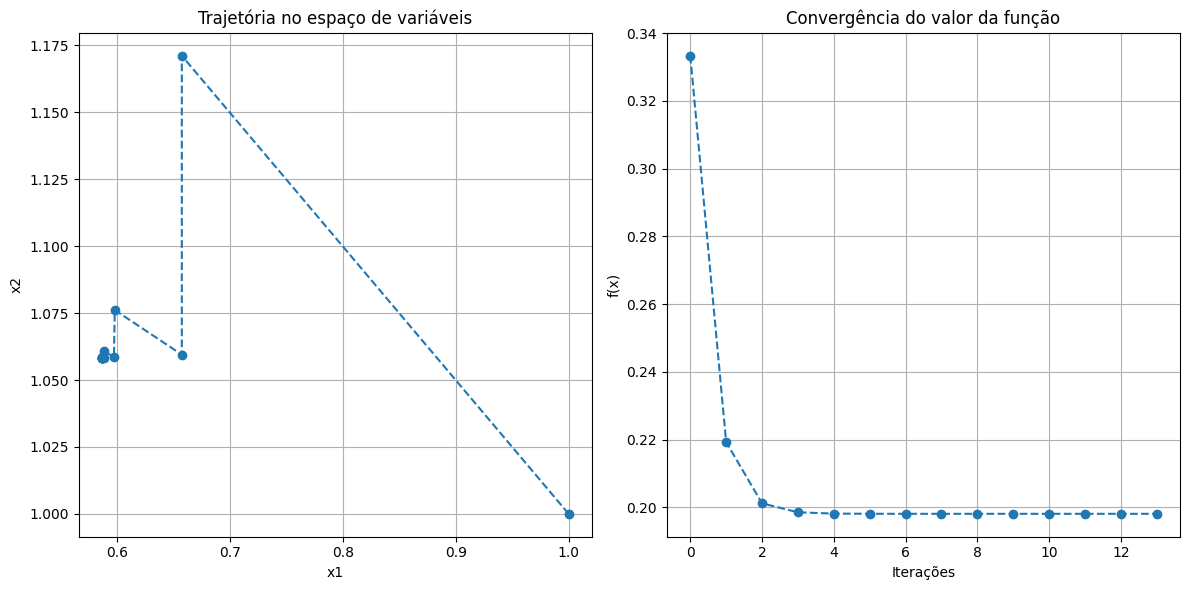

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from otimo import gradiente, SecaoAurea, Gradiente

# Contador de avaliações
global num_avaliacoes
num_avaliacoes = 0

# Função objetivo para teste
def R(X):
    global num_avaliacoes
    num_avaliacoes += 1  # Incrementa o contador de avaliações
    K = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 1]])
    M = np.eye(3)
    X = np.array(X).reshape(-1, 1)
    numerator = (X.T @ K @ X)[0, 0]
    denominator = (X.T @ M @ X)[0, 0]
    return numerator / denominator

# Configuração do método do gradiente
secao_aurea = SecaoAurea(precisao=1e-5)

# Ponto inicial
x0 = np.array([1, 1, 1], dtype=float)

# Parâmetros iniciais
x = x0.reshape(-1, 1)
fx = R(x)
xhist = [np.copy(x)]
fxhist = [fx]

# Critério de parada: número de iterações
for k in range(100):
    grad, _ = gradiente(x, R, fx=fx, metodo='progressiva')

    # Define a direção de busca
    d = -grad

    # Otimização unidimensional para determinar o passo na direção d
    def theta(alpha):
        return R((x + alpha * d).reshape(-1, 1))  # Garante que o formato seja correto

    alpha, _ = secao_aurea.resolva(theta)

    # Atualiza
    x = x + alpha * d
    x = x.reshape(-1, 1)  # Garante que x continue sendo um vetor coluna
    fx = R(x)

    xhist.append(np.copy(x))
    fxhist.append(fx)

    # Critério de parada baseado na norma do gradiente
    if norm(grad) < 1e-5:
        break

xhist = np.array(xhist).squeeze()  # Remove dimensões extras
fxhist = np.array(fxhist)

# Resultados
print("Ponto Ótimo:", x.flatten())
print("Valor Ótimo:", fx)
print("Número de Iterações:", len(xhist) - 1)
print("Número de Avaliações da Função:", num_avaliacoes)

# Plotagem dos resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(xhist[:, 0], xhist[:, 1], '--o')
plt.title('Trajetória no espaço de variáveis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(fxhist, '--o')
plt.title('Convergência do valor da função')
plt.xlabel('Iterações')
plt.ylabel('f(x)')
plt.grid()

plt.tight_layout()
plt.show()
